Stock Price Analysis
===
***
Calculating Risk-vs-Returns Using Sharpe Ratio
---

Background
---

<p>An investment is worth considering if it returns more money than it costs. But returns is only one of the many considerations. Another important consideration is risk, because there are always risks involve resulting in a range of possible outcomes. <b>So how does one compare different investments that may deliver similar results, but exhibit different levels of risks?</b></p>

Introduction to Sharpe Ratio
---

<p>William Sharpe introduced the <a href="https://web.stanford.edu/~wfsharpe/art/sr/sr.htm"><b>reward-to-variability ratio</b></a> in 1966 that came to be known as the <b>Sharpe Ratio</b>:

- It compares the <b>expected returns for two investment opportunities and calculates the additional return per unit of risk</b> an investor could obtain by choosing one over the other.
- In particular, it looks at the <b>difference in returns for two investments and compares the average difference to the standard deviation</b> (as a measure of risk) of this difference. 
- A <b>higher Sharpe ratio means that the reward will be higher for a given amount of risk</b>. It is common to compare a specific opportunity against a benchmark (risk-free investment) that represents an entire category of investments.
- Some examples of <b>commonly used risk-free investments</b> includes: LIBOR, Treasury bills or even putting money in banks (returns is 0%). 
- The Sharpe ratio has been one of the <b>most popular risk/return measures in finance</b>.  In fact, Sharpe ratio is a commonly used indicator by fund managers for portfolio optimisation.
- We shall <b>calculate the Sharpe ratio for the stocks of the two tech giants Facebook and Amazon</b>. As a benchmark, we'll use the index fund of S&amp;P 500 that measures the performance of the 500 largest stocks in the US.
***
Formula of the Sharpe Ratio
-
<img src='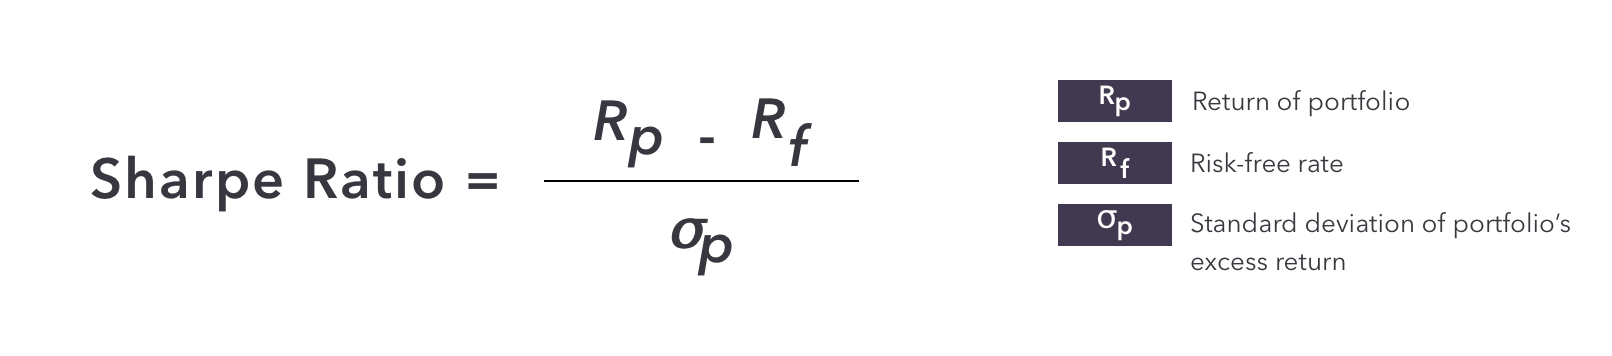
'/>


<b>Dataset Used:</b>

- Stock prices of Facebook, Amazon and S&P 500 in year 2016

Part 1. Read CSV Data using Pandas
---
Read in the stock data for Facebook, Amazon and the S&P 500.


In [1]:
# Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Settings to use qualitative palette
plt.style.use('seaborn-pastel') 
%matplotlib inline

# Reading CSV with Pandas. NaN to be dropped
stock_data = pd.read_csv("data/stock_data.csv", parse_dates=True, index_col = "Date").dropna()
benchmark_data = pd.read_csv("data/benchmark_data.csv", parse_dates=True, index_col = "Date").dropna()

Part 2. Understanding key statistics of the data
---

Display a content summary and the first few lines of each DataFrame to see what kind of data we can use for this analysis.

In [2]:
# Summary and snippet of the stock(AMZN & FB) DataFrame
stock_data.info()
stock_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Amazon    252 non-null    float64
 1   Facebook  252 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB


,Amazon,Facebook
Date,,
2016-01-04,636.989990,102.220001
2016-01-05,633.789978,102.730003
2016-01-06,632.650024,102.970001
2016-01-07,607.940002,97.919998
2016-01-08,607.049988,97.330002


In [3]:
# Summary and snippet of the benchmark(S&P 500) DataFrame
benchmark_data.info()
benchmark_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-01-04 to 2016-12-30
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


,S&P 500
Date,
2016-01-04,2012.66
2016-01-05,2016.71
2016-01-06,1990.26
2016-01-07,1943.09
2016-01-08,1922.03


There are **252 rows** of data and variables.

Part 3. Plotting daily prices for Amazon and Facebook
---

Plot and summarize the <code>stock_data</code>:

,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


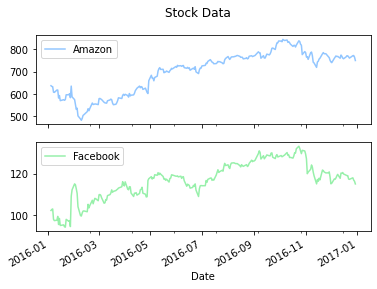

In [4]:
# show line plot with pd.plot()
# setting subplots as both data are on different levels
stock_data.plot(subplots=True, title = "Stock Data")

# Summarise stock_data
stock_data.describe()

We can infer that both stocks share similar trend with the line chart plot.

Part 4. Visualize & summarize daily values for the S&P 500
---

Plot and summarize the <code>benchmark_data</code>.


,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


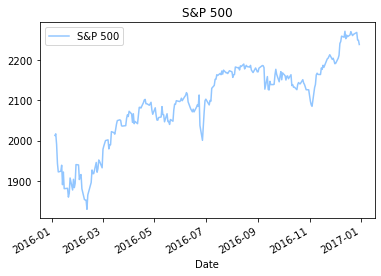

In [5]:
# show line plot with pd.plot()
benchmark_data.plot(title = "S&P 500")

# Summarise benchmark_data
benchmark_data.describe()

Part 5. Manipulating dataframe to get the inputs for the Sharpe ratio (daily stock returns)
---

The Sharpe Ratio uses the <b>difference in returns between the two investment opportunities</b> under consideration. However, our data only shows the <b>historical value of each investment and not the return</b>. To calculate the return, we <b>need to calculate the percentage change in value from one day</b> to the next. 
<br> 
<br>Calculate, plot and summarize the <code>stock_data</code> returns:<br>


,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


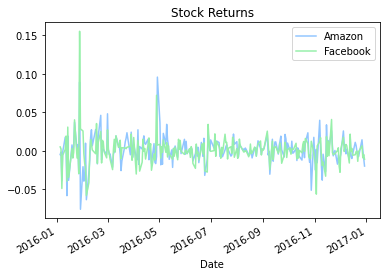

In [6]:
# calculate daily difference of returns and show line plot
stock_returns = stock_data.pct_change()
stock_returns.plot(title = "Stock Returns")
stock_returns.describe()

Part 6. Manipulating dataframe to get the inputs for the Sharpe ratio (daily S&P500 returns)
---
Calculate, plot and summarize the benchmark_data returns:


count    251.000000
mean       0.000458
std        0.008205
min       -0.035920
25%       -0.002949
50%        0.000205
75%        0.004497
max        0.024760
Name: S&P 500, dtype: float64

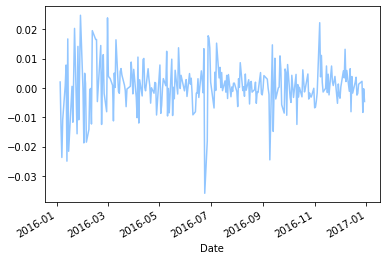

In [7]:
# calculate daily difference of returns and show line plot
sp_returns = benchmark_data["S&P 500"].pct_change()
sp_returns.plot()
sp_returns.describe()

Part 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
---

Calculate the relative performance of stocks vs. the S&amp;P 500 benchmark. This is calculated as the difference in returns between <code>stock_returns</code> and <code>sp_returns</code> for each day.<br>


,Amazon,Facebook
count,251.000000,251.000000
mean,0.000360,0.000168
std,0.016126,0.015439
min,-0.100860,-0.051958
25%,-0.006229,-0.005663
50%,0.000698,-0.000454
75%,0.007351,0.005814
max,0.100728,0.149686


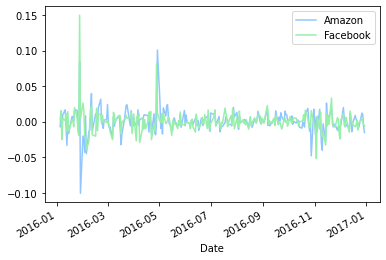

In [8]:
# subtracting sp_returns from stock_returns
excess_returns = stock_returns.sub(sp_returns, axis = 0)
excess_returns.plot()
excess_returns.describe()

Part 8. The Average Difference in Daily Returns Stocks vs S&P 500
---

Calculate the average of the <code>excess_returns</code>. <br> 

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

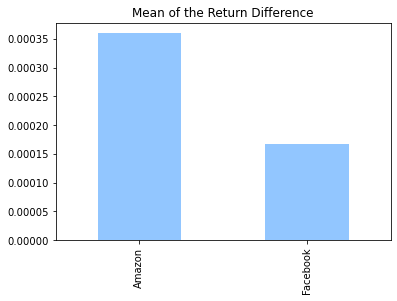

In [10]:
# averaging the excess returns
avg_excess_return = excess_returns.mean()

avg_excess_return.plot.bar(title = "Mean of the Return Difference")

This tells us how much more or less the investment yields per day on average compared to the benchmark. It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook. 

Part 9. Standard Deviation of the Return Difference
---

Calculate and visualize the standard deviation of <code>excess_returns:</code><br>

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

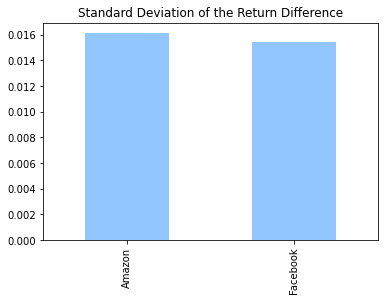

In [11]:
# Calculating the std dev
sd_excess_return = excess_returns.std()

sd_excess_return.plot.bar(title = "Standard Deviation of the Return Difference")

This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500. 
The higher the Standard Deviation, the more volatile the stock is.

Part 10. Collating the Sharpe ratio
---
- Calculate and annualise the Sharpe Ratio.
- Display the annualised Sharpe Ratio as a bar plot.
<br>

The Sharpe Ratio is often <b>annualized</b> by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252<br>

<AxesSubplot:title={'center':'Annualized Sharpe Ratio: Stocks vs S&P 500'}>

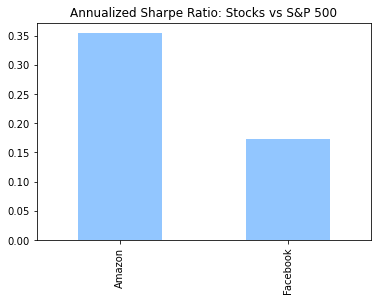

In [12]:
# Dividing avg excess returns with std dev of excess return

daily_sharpe_ratio = avg_excess_return.div(sd_excess_return, axis = 0)
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor, axis = 0)

annual_sharpe_ratio.plot.bar(title = "Annualized Sharpe Ratio: Stocks vs S&P 500")

Part 11. Conclusion
---

<b>In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&amp;P 500 for each unit of risk an investor would have assumed</b>. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.<br>

This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon. <br>

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis.

However, the Sharpe Ratio shows historical results and does not predict the future. One should always do their due diligence in research when making any investment purchase.